<a href="https://colab.research.google.com/github/Tahimi/FiniteDiferenceMethod/blob/main/diffusion1D_FipyFiniteVolume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install fipy
# uncomment to install fipy then restart the runtime environment

In [2]:
import numpy as np
from fipy import *

In [3]:
# space discretization
xL = 0.
xR = 50.
dx = 0.5
delX = xR - xL
nx = int(delX/dx)
mesh = Grid1D(nx=nx, dx=dx) + xL

In [4]:
# time discretization
Fr = 0.5 # Fourier Number: Fr = D*dt/dx**2
D = 10.
dt = Fr*dx**2/D
delT = 5.
stepsNbr = int(delT/dt)

In [5]:
# defining the unkown's distribution
def distributionIn1D(x, yMin, yMax, xc, width, isRectangular = True):
  if isRectangular:
    # rectangular distribuition
    return np.array([yMax if xc-width < xi and xi < xc+width else yMin for xi in x])
  else:
    # Gaussian distribuition
    return yMin + yMax * np.exp(-(x - xc) ** 2 / (2 * width ** 2))

In [6]:
def initialize():
    # unkown's initialization
    global mesh, yMin, yMax, yInit, y, D, eq
    yMin = 0.
    yMax = 1.
    xc = 25.
    width = 2.
    yInitValue = distributionIn1D(x=mesh.x,
                                  yMin=yMin,
                                  yMax=yMax,
                                  xc=xc,
                                  width=width,
                                  isRectangular=False)
    yInit = CellVariable(mesh=mesh, value=yInitValue)
    y = CellVariable(mesh=mesh, value=yInit)

    # applying the BCs and defining the discritized eq.
    # closed BC (Neumann), no leaving material, i.e. grad(y) = 0
    y.faceGrad.constrain((0,), where=mesh.exteriorFaces)

    # Defining the discritized equation
    eq = TransientTerm() == ExplicitDiffusionTerm(coeff=D)

In [7]:
# defining the time-step update function for the
def diffuse1(y, dt):
    eq.solve(var=y, dt=dt)

In [8]:
# displaying some parameters
print('dx = ', dx, '\n'
      'delX = ', delX, '\n'
      'nx = ', nx, '\n'
      'Fr = ', Fr, '\n'
      'D = ', D, '\n'
      'dt = ', dt, '\n'
      'delT = ', delT, '\n'
      'stepsNbr = ', stepsNbr)

dx =  0.5 
delX =  50.0 
nx =  100 
Fr =  0.5 
D =  10.0 
dt =  0.0125 
delT =  5.0 
stepsNbr =  400


In [9]:
# initialize and iterate in time
initialize()
for step in range(stepsNbr):
  diffuse1(y, dt)

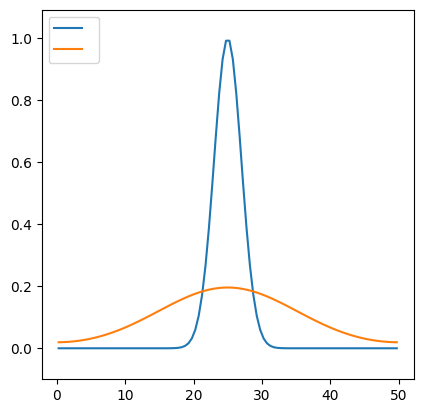

In [10]:
# Ploting the results
viewer = Viewer(vars = (yInit, y),
                datamin = min(yInit.min(), y.min())-.1,
                datamax = max(yInit.max(), y.max())+.1)
viewer.plot()